<a href="https://colab.research.google.com/github/gshartnett/introAI/blob/main/lectures/Week_4_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Introduction to Modern AI - Week 4 Notebook
Gavin Hartnett  
PRGS, Winter Quarter 2022

In [ ]:
## imports

## numpy
import numpy as np
#from numpy.random import default_rng
#rng = default_rng(123)
np.random.seed(123)

## other useful data analysis libraries
import pandas as pd
from sklearn import neighbors

## plotting
from matplotlib.colors import ListedColormap
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

## torch
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.optim.lr_scheduler import StepLR

In [ ]:
## some commands to make the plots look nicer
plt.style.use('seaborn-white')
matplotlib.rcParams.update({'font.size': 16})

In [ ]:
## set the device variable
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [ ]:
## connect Google drive to notebook
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Intro to PyTorch

There are plenty of useful online tutorials for PyTorch. PyTorch is a very well-supported platform, and a simple Google search should be enough to answer most questions you may have. There are also plenty of excellent tutorials. 

What follows here is just a light tutorial for us to walk through in class. The goal is to gain basic familiarity with PyTorch. 

### Tensors
Up until now, numpy has been our main workhorse. Almost all of the numerical objects we've worked with have been numpy arrays.

In [ ]:
x = np.linspace(-np.pi, np.pi, 30)
x

array([-3.14159265, -2.92493109, -2.70826953, -2.49160797, -2.2749464 ,
       -2.05828484, -1.84162328, -1.62496172, -1.40830016, -1.19163859,
       -0.97497703, -0.75831547, -0.54165391, -0.32499234, -0.10833078,
        0.10833078,  0.32499234,  0.54165391,  0.75831547,  0.97497703,
        1.19163859,  1.40830016,  1.62496172,  1.84162328,  2.05828484,
        2.2749464 ,  2.49160797,  2.70826953,  2.92493109,  3.14159265])

In [ ]:
x.dtype

dtype('float64')

In [ ]:
np.sin(x)

array([-1.22464680e-16, -2.14970440e-01, -4.19889102e-01, -6.05174215e-01,
       -7.62162055e-01, -8.83512044e-01, -9.63549993e-01, -9.98533414e-01,
       -9.86826523e-01, -9.28976720e-01, -8.27688998e-01, -6.87699459e-01,
       -5.15553857e-01, -3.19301530e-01, -1.08119018e-01,  1.08119018e-01,
        3.19301530e-01,  5.15553857e-01,  6.87699459e-01,  8.27688998e-01,
        9.28976720e-01,  9.86826523e-01,  9.98533414e-01,  9.63549993e-01,
        8.83512044e-01,  7.62162055e-01,  6.05174215e-01,  4.19889102e-01,
        2.14970440e-01,  1.22464680e-16])

When using PyTorch, we ditch the Numpy arrays and work instead with PyTorch tensors:

In [ ]:
torch.tensor([[1, 2, 3], [4, 5, 6]])

tensor([[1, 2, 3],
        [4, 5, 6]])

We can convert back and forth between the two formats:

In [ ]:
x_torch = torch.from_numpy(x)
x_torch

tensor([-3.1416, -2.9249, -2.7083, -2.4916, -2.2749, -2.0583, -1.8416, -1.6250,
        -1.4083, -1.1916, -0.9750, -0.7583, -0.5417, -0.3250, -0.1083,  0.1083,
         0.3250,  0.5417,  0.7583,  0.9750,  1.1916,  1.4083,  1.6250,  1.8416,
         2.0583,  2.2749,  2.4916,  2.7083,  2.9249,  3.1416],
       dtype=torch.float64)

In [ ]:
x_torch.numpy()

array([-3.14159265, -2.92493109, -2.70826953, -2.49160797, -2.2749464 ,
       -2.05828484, -1.84162328, -1.62496172, -1.40830016, -1.19163859,
       -0.97497703, -0.75831547, -0.54165391, -0.32499234, -0.10833078,
        0.10833078,  0.32499234,  0.54165391,  0.75831547,  0.97497703,
        1.19163859,  1.40830016,  1.62496172,  1.84162328,  2.05828484,
        2.2749464 ,  2.49160797,  2.70826953,  2.92493109,  3.14159265])

We can also combine torch tensors and numpy arrays - but we should be careful when we do so, because such operations will not support autodiff. 

In [ ]:
(x_torch + x)/2

tensor([-3.1416, -2.9249, -2.7083, -2.4916, -2.2749, -2.0583, -1.8416, -1.6250,
        -1.4083, -1.1916, -0.9750, -0.7583, -0.5417, -0.3250, -0.1083,  0.1083,
         0.3250,  0.5417,  0.7583,  0.9750,  1.1916,  1.4083,  1.6250,  1.8416,
         2.0583,  2.2749,  2.4916,  2.7083,  2.9249,  3.1416],
       dtype=torch.float64)

### AutoDiff

One of the main benefits of using torch Tensors and torch functions is the autodiff capability. For example, let's see how we can compute the derivative of $\sin(x)$:

$$ \frac{d}{dx} \sin(x) = \cos(x) \,. $$

In [ ]:
x_torch = torch.tensor([np.pi/4])
y_torch = torch.sin(x_torch)
y_torch.backward()

RuntimeError: ignored

The backward method computes the derivative of that variable (y) with respect to the input variable (x). However, we need to explicitly tell PyTorch that x is the input. In this example it's sort of obvious, but in more complicated scenarios we may be combining many different variables, only some of which we're interested in including in the gradient. For example, the NN is a function $f(x; \theta)$, and in gradient descent we want the gradient with respect to the parameters $\theta$ but not the input data $x$.

The ```requires_grad=True``` optional keyword tells pytorch that x is a leaf variable in the computational graph:

In [ ]:
x_torch = torch.tensor([np.pi/4], requires_grad=True) 
y_torch = torch.sin(x_torch)
y_torch.backward()

Having computed the gradient by calling backwards(), we can access the gradient by calling the grad attribute of *the input tensor*.


In [ ]:
x_torch.grad

tensor([0.7071])

Compare this to the correct answer, $\sin'(\pi/4) = \cos(\pi/4)$. 

In [ ]:
torch.cos(torch.tensor([np.pi/4]))

tensor([0.7071])

This was a 1d example, let's consider a more complicated example:

$$ f(x) = \sum_{i=1}^N \sin^2(x_i) \,. $$

The gradient is:

$$ (\nabla f)_i = 2 \sin(x_i) \cos(x_i) = \sin(2 x_i) $$

In [ ]:
x = np.linspace(-np.pi, np.pi, 30)
x_torch = torch.from_numpy(x)
x_torch.requires_grad = True
y_torch = torch.sum(torch.square(torch.sin(x_torch)))
y_torch.backward()

In [ ]:
x_torch.grad

tensor([ 2.4493e-16,  4.1989e-01,  7.6216e-01,  9.6355e-01,  9.8683e-01,
         8.2769e-01,  5.1555e-01,  1.0812e-01, -3.1930e-01, -6.8770e-01,
        -9.2898e-01, -9.9853e-01, -8.8351e-01, -6.0517e-01, -2.1497e-01,
         2.1497e-01,  6.0517e-01,  8.8351e-01,  9.9853e-01,  9.2898e-01,
         6.8770e-01,  3.1930e-01, -1.0812e-01, -5.1555e-01, -8.2769e-01,
        -9.8683e-01, -9.6355e-01, -7.6216e-01, -4.1989e-01, -2.4493e-16],
       dtype=torch.float64)

In [ ]:
## compare the computed value against the true value
x_torch.grad - torch.sin(2*x_torch)

tensor([ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00, -1.1102e-16,
        -1.1102e-16,  0.0000e+00, -1.3878e-17,  0.0000e+00, -1.1102e-16,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  1.1102e-16,  0.0000e+00,  0.0000e+00,  0.0000e+00,
        -1.1102e-16,  0.0000e+00,  1.3878e-17,  0.0000e+00,  0.0000e+00,
         1.1102e-16, -1.1102e-16,  0.0000e+00,  0.0000e+00,  0.0000e+00],
       dtype=torch.float64, grad_fn=<SubBackward0>)

What happens if we try this but now with $y$ a vector and not a scalar?

In [ ]:
x = np.linspace(-np.pi, np.pi, 30)
x_torch = torch.from_numpy(x)
x_torch.requires_grad = True

## remove the sum, so that y has the same dimensions as x
y_torch = torch.square(torch.sin(x_torch)) 
y_torch.backward()

RuntimeError: ignored

PyTorch only supports gradients with respect to scalar functions when using ```.backwards()```. There are ways to compute gradients of multi-dimensional outputs, but let's leave this for now. 

## Hardware Accelerator

Finally, all of these computations so far have been done using the CPU, not the GPU.

In [ ]:
x_torch.device

device(type='cpu')

If we want to use the GPU, we need to tell PyTorch to move the data onto the GPU (called 'cuda')

In [ ]:
x_torch.to('cuda')

tensor([-3.1416, -2.9249, -2.7083, -2.4916, -2.2749, -2.0583, -1.8416, -1.6250,
        -1.4083, -1.1916, -0.9750, -0.7583, -0.5417, -0.3250, -0.1083,  0.1083,
         0.3250,  0.5417,  0.7583,  0.9750,  1.1916,  1.4083,  1.6250,  1.8416,
         2.0583,  2.2749,  2.4916,  2.7083,  2.9249,  3.1416], device='cuda:0',
       dtype=torch.float64, grad_fn=<ToCopyBackward0>)

--- 
## MNIST Example

The bulk of the code in this section was adapted from the [official PyTorch MNIST example](https://github.com/pytorch/examples/blob/master/mnist/main.py).

### Load the data
First we need to download the dataset. In this case MNIST is such a popular dataset that PyTorch includes code to download it directly. As part of the command to download the data we will include a set of transformations which will be used to preprocess the data.

In [ ]:
## when we download the data let's convert it to a pytorch tensor format and also normalize it
## the normalization is done by subtracting the mean 0.1307 and scaling by the std 0.3081
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

## download the train and test datasets
train_dataset = datasets.MNIST('../data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST('../data', train=False, download=True, transform=transform)

In previous examples we organized the data into matrices $(X_{\text{train}}, X_{\text{test}})$. It is more convenient to use data loaders, which are useful primitives for manipulating the data and cycling through mini-batches. See [here](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html) for a ncie tutorial on data loaders in PyTorch. 

In [ ]:
train_kwargs = {'batch_size': 1000}
test_kwargs = {'batch_size': 1000}

train_loader = torch.utils.data.DataLoader(train_dataset, **train_kwargs)
test_loader = torch.utils.data.DataLoader(test_dataset, **test_kwargs)

Let's visualize the data

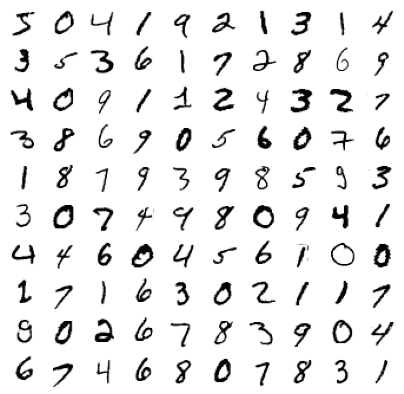

In [ ]:
train_dataset_iterable = iter(train_dataset)

fig = plt.figure(figsize=(7,7))
for i in range(100):
    image, label = next(train_dataset_iterable)
    plt.subplot(10,10,i+1)
    plt.imshow(image[0].reshape((28, 28)))
    #plt.title('digit: %i' %label, fontsize=12)
    plt.axis('off')
#plt.savefig('/content/gdrive/MyDrive/Intro to AI/figures/mnist.pdf')
plt.show()

### Define the neural network model

Next, we will define our NN model. The code below follows the standard PyTorch approach towards defining models as classes. The class inherits the properties of the ```nn.Module class```. The main method is ```forward```, and this corresponds to the forward pass through the network.

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.dropout1 = nn.Dropout(0.25)
        self.dropout2 = nn.Dropout(0.5)
        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        ## convolutional block (no max pool - not sure why)
        x = self.conv1(x)
        x = F.relu(x)

        ## convolutional block
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)

        ## fully connected layer 1
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)

        ## fully connected layer 2
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        return output

    def forward2(self, x):
        '''
        This is a copy of the above forward method, but with 
        print statements inserted each time the dimension of 
        variable changes
        '''
        print('shape of input layer: ', x.shape)

        x = self.conv1(x)
        x = F.relu(x)
        print('shape of hidden layer 1: ', x.shape)

        ## convolutional block
        x = self.conv2(x)
        x = F.relu(x)
        print('shape of hidden layer 2 before maxpool: ', x.shape)
        x = F.max_pool2d(x, 2)
        print('shape of hidden layer 2: ', x.shape)
        
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        print('shape of hidden layer 3: ', x.shape)

        x = self.fc2(x)
        print('shape of hidden layer 4: ', x.shape)

        output = F.log_softmax(x, dim=1)
        print('shape of output layer: ', output.shape)

        return output

Having defined our model as a class, let's instantiate an instance of that class.

In [ ]:
model = Net().to(device) #the .to(device) moves the model to our GPU/TPU if present

### Train the model

PyTorch also includes useful tools for the optimization of the model (using some variation of SGD). The PyTorch example chose to use the Adadelta optimizer. 

In [ ]:
optimizer = optim.Adadelta(model.parameters(), lr=1.0)
scheduler = StepLR(optimizer, step_size=1, gamma=0.7)

It will be important to evaluate the performance of the model on both the training and testing sets throughout training. Since we will do this often, it's convenient to define a function that cycles through all the data in a given set and computes the loss and accuracy. 

In [ ]:
def evaluate(model, data_loader):

    ## if we are using things like dropout or batchnorm, 
    ## the forward pass through the model is different for 
    ## training and testing model.eval() puts the model 
    ## in "evaluation" mode. 
    model.eval()

    ## init the loss and correct variables
    loss = 0
    correct = 0

    ## torch.no_grad() turns off autodiff 
    with torch.no_grad():

        ## cycle through all data in the mini-batch
        for data, target in data_loader:

            ## move the (x,y) data to the device
            data, target = data.to(device), target.to(device)
            
            ## this computes the output of the model through a forward pass
            output = model(data)
            
            ## this computes the loss (negative log likelihood)
            loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            
            ## this computes the predictions (i.e. the class whose estimated probability is greatest)
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            
            ## correct counts the number of correct predictions so far
            correct += pred.eq(target.view_as(pred)).sum().item()

    ## normalize the loss by number of elements in the dataset
    loss /= len(data_loader.dataset)

    ## get the accuracy
    accuracy = correct/len(data_loader.dataset)

    return loss, accuracy

We're finally ready to carry out the training. Let's train for 100 epochs, which is overkill, but it will serve to illustrate the logic behind early stopping.

In [ ]:
## init some lists and set training params
n_epochs = 100
loss_history_train = []
loss_history_test = []

## if we are using things like dropout or batchnorm, the forward pass through
## the model is different for training and testing
## model.train() puts the model in "train" mode. 
model.train()

## loop over all the epochs
for epoch in range(n_epochs):
        
    ## for each epoch, cycle through the mini-batches using the dataloader
    for batch_idx, (data, target) in enumerate(train_loader):
        
        ## move the (x,y) data to the device
        data, target = data.to(device), target.to(device)

        ## this zeros out the gradient
        optimizer.zero_grad()

        ## this computes the output of the model through a forward pass
        output = model(data)

        ## this computes the loss (negative log likelihood)
        loss = F.nll_loss(output, target)

        ## this is the (reverse mode) autodiff step where the gradient is computed
        loss.backward()

        ## equipped with the just-computed gradient, this updates the weights
        optimizer.step()
    
    ## collect the average loss on both datasets for evaluation purposes
    loss_history_train.append(evaluate(model, train_loader)[0])
    loss_history_test.append(evaluate(model, test_loader)[0])
    print('Train Epoch: {}, Train Loss: {:.6f}, Test Loss: {:.6f}'.
          format(epoch, loss_history_train[-1], loss_history_test[-1]))

Train Epoch: 0, Train Loss: 0.125788, Test Loss: 0.111190
Train Epoch: 1, Train Loss: 0.059260, Test Loss: 0.055836
Train Epoch: 2, Train Loss: 0.040348, Test Loss: 0.042714
Train Epoch: 3, Train Loss: 0.031152, Test Loss: 0.037238
Train Epoch: 4, Train Loss: 0.022254, Test Loss: 0.033078
Train Epoch: 5, Train Loss: 0.016879, Test Loss: 0.030754
Train Epoch: 6, Train Loss: 0.018504, Test Loss: 0.036188
Train Epoch: 7, Train Loss: 0.011376, Test Loss: 0.033541
Train Epoch: 8, Train Loss: 0.008768, Test Loss: 0.033917
Train Epoch: 9, Train Loss: 0.007389, Test Loss: 0.036237
Train Epoch: 10, Train Loss: 0.006423, Test Loss: 0.038499
Train Epoch: 11, Train Loss: 0.004455, Test Loss: 0.037234
Train Epoch: 12, Train Loss: 0.003885, Test Loss: 0.038138
Train Epoch: 13, Train Loss: 0.003115, Test Loss: 0.038275
Train Epoch: 14, Train Loss: 0.002397, Test Loss: 0.038750
Train Epoch: 15, Train Loss: 0.001809, Test Loss: 0.039592
Train Epoch: 16, Train Loss: 0.001033, Test Loss: 0.039222
Train E

Having trained out model, let's plot the loss throughout training on both the train and test sets.

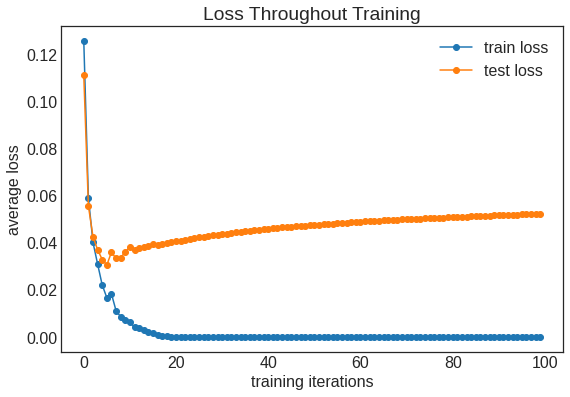

In [ ]:
fig, ax = plt.subplots(figsize=(9,6))
ax.plot(loss_history_train, label='train loss', marker='o')
ax.plot(loss_history_test, label='test loss', marker='o')
#ax.set_yscale('log')
ax.legend()
ax.set_title('Loss Throughout Training')
ax.set_xlabel('training iterations')
ax.set_ylabel('average loss')
plt.savefig('/content/gdrive/MyDrive/Intro to AI/figures/mnist_earlystopping.pdf')
plt.show()

Lastly, let's use the ```forward2``` method (same as ```forward``` but with print statements) to see how the dimension of $x$ changes as we move through the network in a forward pass.

In [ ]:
## let's inspect how the dimension of x changes as we move through the NN
data, target = next(iter(train_loader))
data, target = data.to(device), target.to(device)
model.forward2(data);

shape of input layer:  torch.Size([1000, 1, 28, 28])
shape of hidden layer 1:  torch.Size([1000, 32, 26, 26])
shape of hidden layer 2 before maxpool:  torch.Size([1000, 64, 24, 24])
shape of hidden layer 2:  torch.Size([1000, 64, 12, 12])
shape of hidden layer 3:  torch.Size([1000, 128])
shape of hidden layer 4:  torch.Size([1000, 10])
shape of output layer:  torch.Size([1000, 10])


## CIFAR-10 Example

At the moment this example just shows how to download the CIFAR-10 data. 

### Load the data
First we need to download the dataset. In this case MNIST is such a popular dataset that PyTorch includes code to download it directly. As part of the command to download the data we will include a set of transformations which will be used to preprocess the data.

In [ ]:
## when we download the data let's convert it to a pytorch tensor format and also normalize it
## the normalization is done by subtracting the mean 0.1307 and scaling by the std 0.3081
transform = transforms.Compose([transforms.ToTensor()])

## download the train and test datasets
train_dataset = datasets.CIFAR10('../data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10('../data', train=False, download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


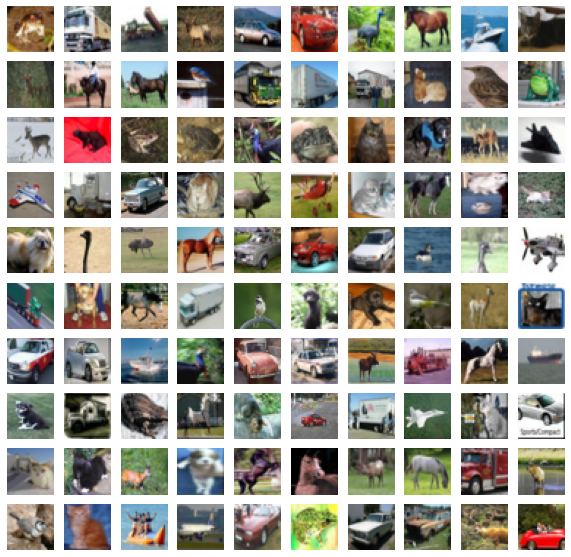

In [ ]:
train_dataset_iterable = iter(train_dataset)

fig = plt.figure(figsize=(10,10))
for i in range(100):
    image, label = next(train_dataset_iterable)
    plt.subplot(10,10,i+1)
    plt.imshow(image.permute(1, 2, 0))
    #plt.imshow(image)
    #plt.title('digit: %i' %label, fontsize=12)
    plt.axis('off')
plt.savefig('/content/gdrive/MyDrive/Intro to AI/figures/cifar.pdf')
plt.show()

## Taylor Expansion

In [ ]:
x = np.linspace(-2*np.pi, 2*np.pi, 100)

In [ ]:
def dsin(x, n):
    if n % 4 == 0:
        return np.sin(x)
    elif n % 4 == 1:
        return np.cos(x)
    elif n % 4 == 2:
        return - np.sin(x)
    elif n % 4 == 3:
        return - np.cos(x)

In [ ]:
def taylor_expn(x, n):
    out = np.zeros(x.shape)
    for k in range(n+1):
        out += 1/np.math.factorial(k) * dsin(0, k) * x**k
    return out

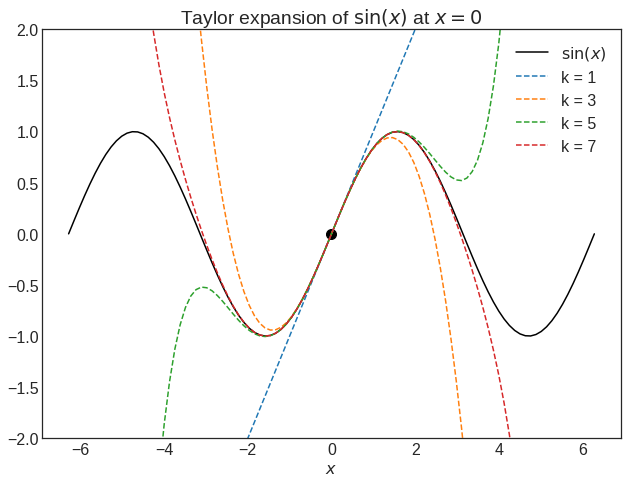

In [ ]:
fig = plt.figure(figsize=(9,7))

plt.plot(x, np.sin(x), color='k', label=r'$\sin(x)$')
plt.plot([0], [0], marker="o", markersize=10, color='k')

for k in range(1, 9, 2):
    plt.plot(x, taylor_expn(x, k), label='k = %i' %k, linestyle='--')
plt.legend()#bbox_to_anchor=(1.05, 1.05))
plt.ylim([-2, 2])
plt.xlabel(r'$x$')
plt.title(r'Taylor expansion of $\sin(x)$ at $x=0$')
plt.tight_layout()
plt.savefig('/content/gdrive/MyDrive/Intro to AI/figures/taylor_expansion.pdf')
plt.show()